In [3]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder \
    .appName("YourAppName") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

# Load CSV file into DataFrame
df = spark.read.csv("C:\\Users\\xlgho\\Desktop\\Projects\\Pyspark\\employees1.csv", header=True, inferSchema=True)

# Show the schema of the DataFrame
df.printSchema()

# Show the first few rows of the DataFrame
df.show()

root
 |-- First Name: string (nullable = true)
 |-- Last Name: string (nullable = true)
 |-- Email: string (nullable = true)
 |-- Phone: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Job Title: string (nullable = true)
 |-- Years Of Experience: integer (nullable = true)
 |-- Salary: integer (nullable = true)
 |-- Department: string (nullable = true)

+-----------+---------+--------------------+--------------------+------+---+--------------------+-------------------+------+----------+
| First Name|Last Name|               Email|               Phone|Gender|Age|           Job Title|Years Of Experience|Salary|Department|
+-----------+---------+--------------------+--------------------+------+---+--------------------+-------------------+------+----------+
|       Jose|    Lopez|joselopez0944@sli...|+1-971-533-4552x1542|  male| 25|     Project Manager|                  1|  8500|   Product|
|      Diane|   Carter|dianecarter1228@s...| 

In [7]:
# Filter male employees
male_employees = df.filter(df['Gender'] == 'male')
print("Male Employees:")
male_employees.select('Last Name', 'Job Title', 'Salary').show()

# Filter female employees
female_employees = df.filter(df['Gender'] == 'female')
print("Female Employees:")
female_employees.select('Last Name', 'Job Title', 'Salary').show()


Male Employees:
+---------+--------------------+------+
|Last Name|           Job Title|Salary|
+---------+--------------------+------+
|    Lopez|     Project Manager|  8500|
|   Foster|     Project Manager| 17000|
|   Hunter|     Project Manager| 14500|
|   Jacobs|     Project Manager| 10500|
|     Tate|    Mobile Developer| 11000|
|  Simpson|     DevOps Engineer| 15000|
| Mckenzie|Machine Learning ...| 10000|
|    Smith|Machine Learning ...| 14000|
|   Benson|       Web Developer|  7500|
|  Jimenez|    Mobile Developer|  6500|
|    Boyle|              Tester|  9000|
|  Padilla|              Tester|  9500|
|   Suarez|              Tester|  9500|
|   Porter|     DevOps Engineer|  9500|
|    Reyes|            Designer|  7000|
|    Kirby|Machine Learning ...| 10000|
|    Hogan|              Tester|  7000|
| Thompson|Machine Learning ...|  7000|
| Randolph|            Designer|  8500|
|   Keller|       Web Developer|  8000|
+---------+--------------------+------+
only showing top 20 rows

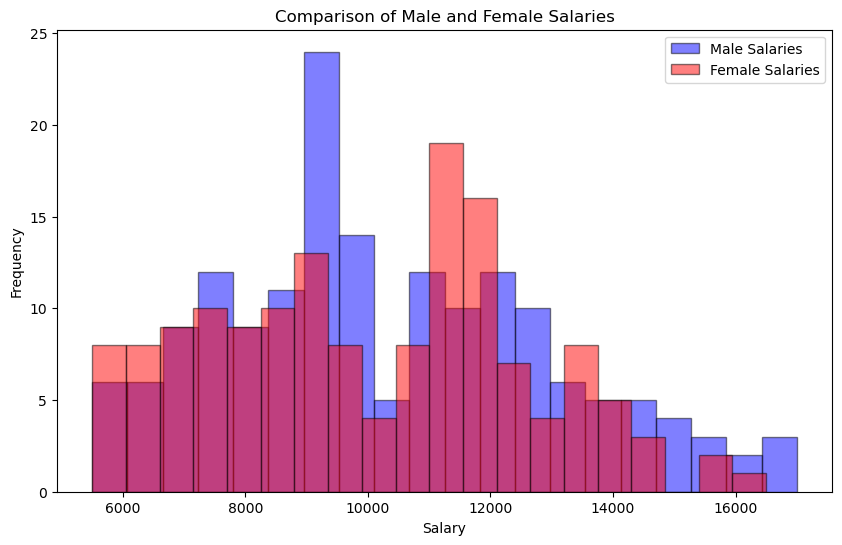

In [8]:
import matplotlib.pyplot as plt

# Filter male and female employees
male_salaries = df.filter(df['gender'] == 'male').select('salary').rdd.flatMap(lambda x: x).collect()
female_salaries = df.filter(df['gender'] == 'female').select('salary').rdd.flatMap(lambda x: x).collect()

# Plotting
plt.figure(figsize=(10, 6))

plt.hist(male_salaries, bins=20, color='blue', alpha=0.5, label='Male Salaries', edgecolor='black')
plt.hist(female_salaries, bins=20, color='red', alpha=0.5, label='Female Salaries', edgecolor='black')

plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Comparison of Male and Female Salaries')
plt.legend()

plt.show()


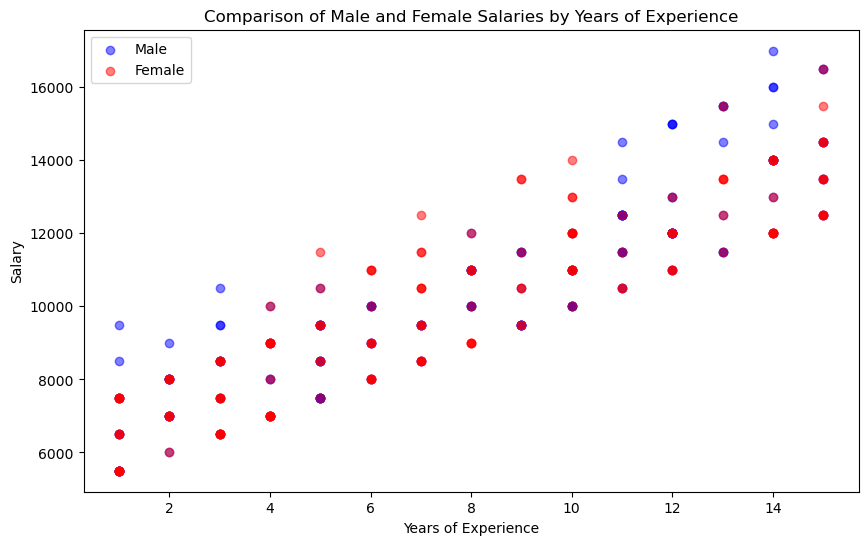

In [9]:
# Filter male and female employees
male_data = df.filter(df['Gender'] == 'male').select('Years Of Experience', 'Salary').collect()
female_data = df.filter(df['Gender'] == 'female').select('Years Of Experience', 'Salary').collect()

# Extracting years of experience and salaries
male_years_exp, male_salaries = zip(*male_data)
female_years_exp, female_salaries = zip(*female_data)

# Plotting
plt.figure(figsize=(10, 6))

plt.scatter(male_years_exp, male_salaries, color='blue', alpha=0.5, label='Male')
plt.scatter(female_years_exp, female_salaries, color='red', alpha=0.5, label='Female')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Comparison of Male and Female Salaries by Years of Experience')
plt.legend()

plt.show()